<a href="https://colab.research.google.com/github/hominiikkurthi-hue/gittutorials/blob/main/Algerian_Forest_Fires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as asns

In [ ]:
df = pd.read_csv('Algerian_forest_fires_dataset.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Algerian_forest_fires_dataset.csv'

In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [ ]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [ ]:
# Drop 'day', 'month', 'year' only if they exist in the DataFrame
df.drop(columns=[col for col in ['day', 'month', 'year'] if col in dataset.columns], inplace=True)


In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [ ]:
# Step 1: Check all column names
print("Columns in the DataFrame:")
print(df.columns)

# Step 2: Strip extra spaces (common issue)
df.columns = df.columns.str.strip()

# Step 3: Print column names again after cleaning
print("\nCleaned column names:")
print(df.columns)

# Step 4: Check if 'Classes' column exists and print value counts
if 'Classes' in df.columns:
    print("\nValue counts of 'Classes' column:")
    print(df['Classes'].value_counts())
else:
    print("\n❌ 'Classes' column not found. Please use the correct column name from the list above.")

Columns in the DataFrame:
Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

Cleaned column names:
Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

Value counts of 'Classes' column:
Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
Classes            1
not fire           1
not fire           1
Name: count, dtype: int64


In [ ]:
##Encoding
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)

In [ ]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,1
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,0
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0
246,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0


In [ ]:
df['Classes'].value_counts()

,count
Classes,
1,138
0,109


In [ ]:
##independent and dependent features
X=df.drop('FWI',axis=1)
y=df['FWI']

In [ ]:
X.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0


In [ ]:
y

,FWI
0,0.5
1,0.4
2,0.1
3,0
4,0.5
...,...
242,6.5
243,0
244,0.2
245,0.7


In [ ]:
##Train test spilit

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
X_train.shape,X_test.shape

((185, 13), (62, 13))

In [ ]:
# Drop unwanted columns (no duplicates, all properly quoted)
df_numeric = df.drop(['day', 'month', 'year', 'Temperature'], axis=1)

# Convert the rest to float
df_numeric = df_numeric.astype(float)

# Optional: Convert original day/month/year to numeric in df (if needed elsewhere)
df['day'] = pd.to_numeric(df['day'], errors='coerce')
df['month'] = pd.to_numeric(df['month'], errors='coerce')
df['year'] = pd.to_numeric(df['year'], errors='coerce')



ValueError: could not convert string to float: ' RH'

In [ ]:
X_train.corr()

ValueError: could not convert string to float: 'day'

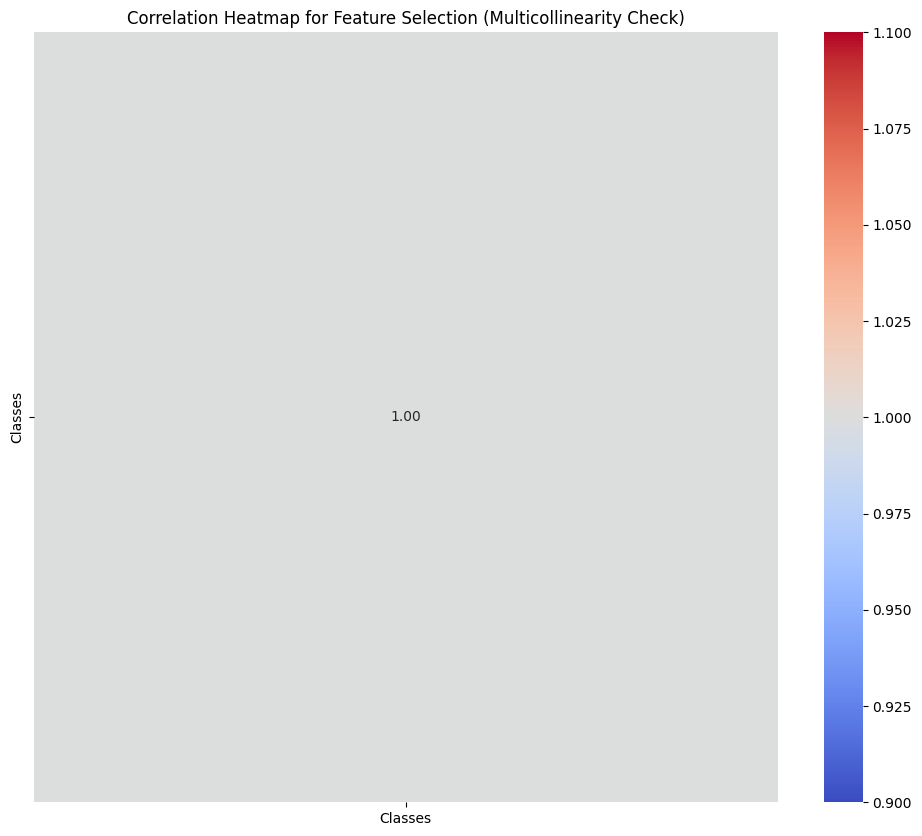

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns from X_train
numeric_X_train = X_train.select_dtypes(include=['number'])

# Compute the correlation matrix
corr = numeric_X_train.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Feature Selection (Multicollinearity Check)')
plt.show()



In [ ]:
##feature selection based on coorelaion
# Step 1: Select only numeric columns
numeric_X_train = X_train.select_dtypes(include=['number'])

# Step 2: Compute correlation matrix
correlation_matrix = numeric_X_train.corr()

# Step 3: Display full correlation matrix
print("🔍 Full Correlation Table:")
print(correlation_matrix.to_string())  # Ensures full table is printed, not truncated


🔍 Full Correlation Table:
         Classes
Classes      1.0


In [ ]:
# Select only numeric columns from X_train
numeric_X_train = X_train.select_dtypes(include=['number'])

# Now compute the correlation matrix
correlation_matrix = numeric_X_train.corr()

# Display it
print(correlation_matrix)


         Classes
Classes      1.0


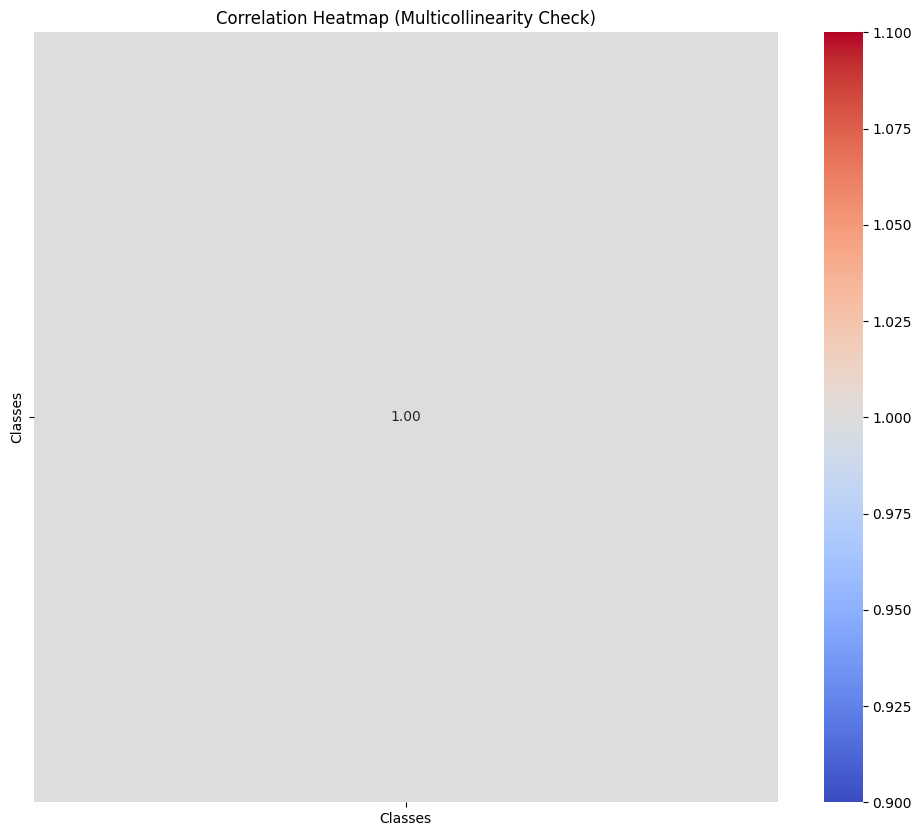

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Select only numeric columns from X_train
numeric_X_train = X_train.select_dtypes(include=['number'])

# Step 2: Compute the correlation matrix
corr = numeric_X_train.corr()

# Step 3: Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Multicollinearity Check)')
plt.show()
